In [ ]:
import pandas as pd
from google.colab import files
files.upload()

Saving monthly_rebate_file_pseg202407_v2_without PII.xlsx to monthly_rebate_file_pseg202407_v2_without PII.xlsx


{'monthly_rebate_file_pseg202407_v2_without PII.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x1a.vY\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\

In [ ]:
df = pd.read_excel("monthly_rebate_file_pseg202407_v2_without PII.xlsx")
df.head()


,marketplace_id,fulfillment_date,purchase_date,internal_order_number,store_order_number,rebate_sku,manufacturer,product_description,product_category,serial_number,rebate_id,item,rebate_quantity,rebate_amount,terms_and_conditions,survey_answers,validation_method,internal_utility_uuid
0,PSEG,2024-07-31,2024-07-31,CS2080903,PSEG_01961019_001,EB-STATE3LT-02,ecobee,ecobee3 lite,Thermostat,416439925283,THERM,Rebate,1,-99.99,"[""serviced_by_pseg"",""terms_and_conditions""]","{""fuel_type"":""gas_electric"",""heating_fuel"":""el...",account_number,0274adc3-3088-59c2-98dc-4198ff2a9539
1,PSEG,2024-07-31,2024-07-31,CS2080902,PSEG_01961018_001,EB-STATE3LT-02,ecobee,ecobee3 lite,Thermostat,416401931719,THERM,Rebate,1,-99.99,"[""serviced_by_pseg"",""terms_and_conditions""]","{""fuel_type"":""gas_electric"",""heating_fuel"":""el...",multi_modal_address,0274adc3-3088-59c2-98dc-4198ff2a9539
2,PSEG,2024-07-31,2024-07-31,CS2080900,PSEG_01960945_001,EB-STATE3LT-02,ecobee,ecobee3 lite,Thermostat,416452799180,THERM,Rebate,1,-99.99,"[""serviced_by_pseg"",""terms_and_conditions""]","{""fuel_type"":""gas_electric"",""heating_fuel"":""na...",multi_modal_address,0274adc3-3088-59c2-98dc-4198ff2a9539
3,PSEG,2024-07-31,2024-07-31,CS2080899,PSEG_01961009_001,EB-STATE3LT-02,ecobee,ecobee3 lite,Thermostat,416427595003,THERM,Rebate,1,-99.99,"[""serviced_by_pseg"",""terms_and_conditions""]","{""fuel_type"":""gas_only"",""heating_fuel"":""natura...",multi_modal_address,0274adc3-3088-59c2-98dc-4198ff2a9539
4,PSEG,2024-07-31,2024-07-31,CS2080898,PSEG_01960928_001,EB-STATE3LT-02,ecobee,ecobee3 lite,Thermostat,416410392817,THERM,Rebate,1,-99.99,"[""serviced_by_pseg"",""terms_and_conditions""]","{""fuel_type"":""gas_electric"",""heating_fuel"":""na...",account_number,0274adc3-3088-59c2-98dc-4198ff2a9539


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store data
categories = []
kwh_values = []
device_types = []

# Loop for thermostats
for index, row in df.iterrows():
    kwh_tstat = 0
    category = ""

    if row['product_category'] == 'Thermostat':
        if row['heating_fuel'] == 'natural_gas' and row['therm_control'] == 'heating':
            category = "Gas Heat and no CAC or muni"
            kwh_tstat = 40.37 / 0.0341296
        elif row['heating_fuel'] == 'natural_gas' and row['therm_control'] == 'both':
            category = "Gas Heat w/ CAC"
            kwh_tstat = 142.45
        elif row['heating_fuel'] == 'electric_heat' and row['therm_control'] == 'both':
            category = "Electric A/C and Elec Heat"
            kwh_tstat = 291.19
        elif row['heating_fuel'] == 'electric_heat' and row['therm_control'] == 'cooling':
            category = "Electric A/C and No Natural Gas"
            kwh_tstat = 142.45
        elif row['heating_fuel'] == 'electric_heat' and row['therm_control'] == 'heating':
            category = "No Central A/C and Elec Heat"
            kwh_tstat = 148.74

        categories.append(category)
        kwh_values.append(kwh_tstat)
        device_types.append("Thermostat")

# Loop for advanced power strips
for index, row in df.iterrows():
    kwh_strip = 0
    if row['product_category'] == 'Advanced Power Strip':
        if row['rebate_id'] == 'APS_TIER1':
            kwh_strip = 102.8
            category = "APS Tier 1"
        else:
            kwh_strip = 346.0
            category = "APS Tier 2"

        categories.append(category)
        kwh_values.append(kwh_strip)
        device_types.append("Advanced Power Strip")

# Create a new DataFrame for visualization
plot_df = pd.DataFrame({
    'Category': categories,
    'kWh': kwh_values,
    'Device Type': device_types
})

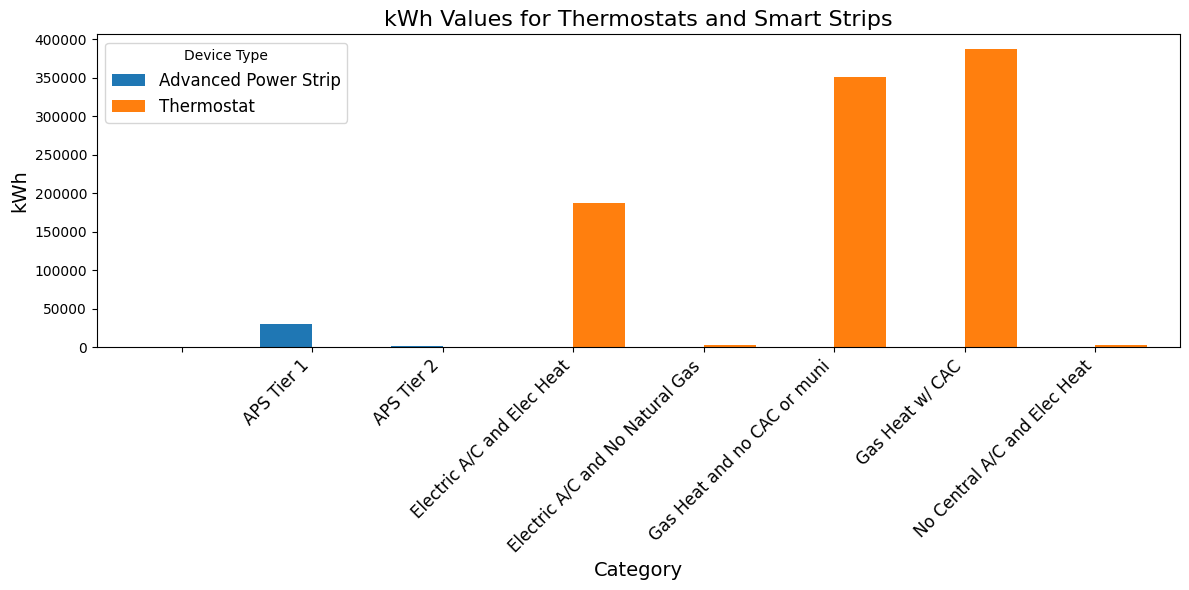

In [ ]:
agg_df = plot_df.groupby(['Category', 'Device Type'])['kWh'].sum().reset_index()

# Pivot the data for grouped bar plotting
pivot_df = agg_df.pivot(index='Category', columns='Device Type', values='kWh')

# Plotting
pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customizing the plot
plt.title('kWh Values for Thermostats and Smart Strips', fontsize=16)
plt.ylabel('kWh', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Device Type', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()